### Ayushi Malaviya 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wisc_bc_ContinuousVar.csv', na_values = '?')

In [3]:
data.shape

(569, 32)

In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

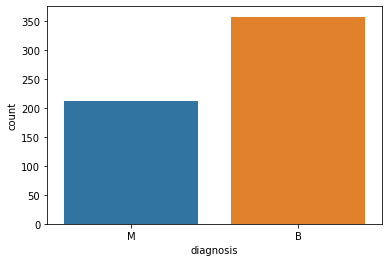

In [6]:
sns.countplot(x='diagnosis', data=data)#biased classification

In [7]:
X = data.loc[:,data.columns.drop(['diagnosis'])]
y = data['diagnosis']

In [8]:
#to have look if id is important feature or not
rf = RandomForestClassifier() 
#random forest takes care of categorical values, hence y is not labelencoded.
rf.fit(X, y)

RandomForestClassifier()

<AxesSubplot:>

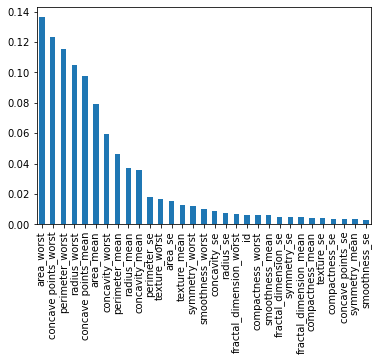

In [9]:
rf.feature_importances_

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')

In [10]:
#id has very low importance before and after scaling and intuitvely it is not relevant. hence deleting
X = X.loc[:,X.columns.drop(['id'])]

In [11]:
#applied labelencoder to classification column
Encoder = LabelEncoder()
y = Encoder.fit_transform(y) #Malignant = 1 and Benign = 0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [13]:
#scaling the continuous and higher values columns into reduced range
sc_feature = StandardScaler()
X_train = sc_feature.fit_transform(X_train.values)
X_test = sc_feature.transform(X_test.values)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [14]:
#after scaling important feature observation
rf1 = RandomForestClassifier() 
rf1.fit(X_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

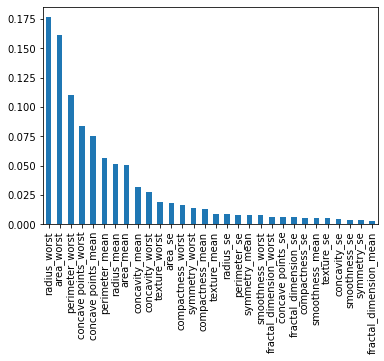

In [15]:
rf1.feature_importances_

feat_importances = pd.Series(rf1.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')

#### Model Development

In [16]:
#Now dense is use to define hidden and output layer separately
ann_model_0 = 'Hidden layer 1 = Relu, Hidden_layer 2 =  Relu, Output_Layer: Sigmoid'
ann0 = keras.models.Sequential()
ann0.add(keras.layers.Dense(5, input_dim=30, activation='relu'))# input_dim inclues column names
ann0.add(keras.layers.Dense(5, activation='relu'))#2nd hidden layer
ann0.add(keras.layers.Dense(1, activation='sigmoid'))#output layer
#optimizer is used for optimal number of weight
#loss refers to loss function (binary_crossentropy is used for binary class)
#metrics accuracy by giving any metrics. I have given auc and accuracy
ann0.compile(optimizer='adam',loss='binary_crossentropy', metrics=[keras.metrics.AUC()])
model0 = ann0.fit(X_train, y_train, epochs=80, batch_size = 10)

Epoch 1/80
40/40 [==============================] - 1s 2ms/step - loss: 0.4181 - auc: 0.9142
Epoch 2/80
40/40 [==============================] - 0s 1ms/step - loss: 0.3308 - auc: 0.9522
Epoch 3/80
40/40 [==============================] - 0s 1ms/step - loss: 0.2659 - auc: 0.9692
Epoch 4/80
40/40 [==============================] - 0s 2ms/step - loss: 0.2193 - auc: 0.9786
Epoch 5/80
40/40 [==============================] - 0s 2ms/step - loss: 0.1842 - auc: 0.9854
Epoch 6/80
40/40 [==============================] - 0s 2ms/step - loss: 0.1551 - auc: 0.9894
Epoch 7/80
40/40 [==============================] - 0s 2ms/step - loss: 0.1334 - auc: 0.9927
Epoch 8/80
40/40 [==============================] - 0s 2ms/step - loss: 0.1184 - auc: 0.9942
Epoch 9/80
40/40 [==============================] - 0s 1ms/step - loss: 0.1072 - auc: 0.9948
Epoch 10/80
40/40 [==============================] - 0s 2ms/step - loss: 0.0975 - auc: 0.9959
Epoch 11/80
40/40 [==============================] - 0s 2ms/step - lo

In [17]:
ann_model_1 = 'Hidden layer 1 = Relu, Hidden_layer 2 =  Relu, Output_Layer: Relu'
ann1 = keras.models.Sequential()
ann1.add(keras.layers.Dense(5, input_dim=30, activation='relu'))
ann1.add(keras.layers.Dense(5, activation='relu'))
ann1.add(keras.layers.Dense(1, activation='relu'))
ann1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model1 = ann1.fit(X_train, y_train, epochs=80, batch_size = 10)

Epoch 1/80
40/40 [==============================] - 1s 2ms/step - loss: 5.2920 - accuracy: 0.6332
Epoch 2/80
40/40 [==============================] - 0s 2ms/step - loss: 4.9775 - accuracy: 0.6407
Epoch 3/80
40/40 [==============================] - 0s 2ms/step - loss: 4.1074 - accuracy: 0.6759
Epoch 4/80
40/40 [==============================] - 0s 1ms/step - loss: 3.3512 - accuracy: 0.7136
Epoch 5/80
40/40 [==============================] - 0s 2ms/step - loss: 2.3875 - accuracy: 0.7714
Epoch 6/80
40/40 [==============================] - 0s 2ms/step - loss: 2.0065 - accuracy: 0.7990
Epoch 7/80
40/40 [==============================] - 0s 1ms/step - loss: 1.7935 - accuracy: 0.8166
Epoch 8/80
40/40 [==============================] - 0s 1ms/step - loss: 1.3780 - accuracy: 0.8467
Epoch 9/80
40/40 [==============================] - 0s 1ms/step - loss: 1.0638 - accuracy: 0.8869
Epoch 10/80
40/40 [==============================] - 0s 1ms/step - loss: 0.9846 - accuracy: 0.8894
Epoch 11/80
40/40 [

In [21]:
ann_model_2 = 'Hidden layer 1 = sigmoid, Hidden_layer 2 =  sigmoid, Output_Layer: Softmax'
ann2 = keras.models.Sequential()
ann2.add(keras.layers.Dense(5, input_dim=30, activation='relu'))
#ann2.add(keras.layers.Dense(5, activation='sigmoid'))
#regularization to reduce the training process.
ann2.add(keras.layers.Dropout(0.2))
ann2.add(keras.layers.Dense(1, activation='softmax'))
ann2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model2 = ann2.fit(X_train, y_train, epochs=80, batch_size = 10)

Epoch 1/80
40/40 [==============================] - 1s 2ms/step - loss: 0.9075 - accuracy: 0.3668
Epoch 2/80
40/40 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.3668
Epoch 3/80
40/40 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.3668
Epoch 4/80
40/40 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.3668
Epoch 5/80
40/40 [==============================] - 0s 1ms/step - loss: 0.2929 - accuracy: 0.3668
Epoch 6/80
40/40 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.3668
Epoch 7/80
40/40 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.3668
Epoch 8/80
40/40 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.3668
Epoch 9/80
40/40 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.3668
Epoch 10/80
40/40 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.3668
Epoch 11/80
40/40 [

In [19]:
ann_model_3 = 'Hidden layer 1 = Sigmoid, Hidden_layer 2 =  Sigmoid, Output_Layer: Sigmoid'
ann3 = keras.models.Sequential()
ann3.add(keras.layers.Dense(5, input_dim=30, activation='sigmoid'))
ann3.add(keras.layers.Dense(5, activation='sigmoid'))
ann3.add(keras.layers.Dense(1, activation='sigmoid'))
ann3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model3 = ann3.fit(X_train, y_train, epochs=80, batch_size = 10)

Epoch 1/80
40/40 [==============================] - 1s 2ms/step - loss: 0.6483 - accuracy: 0.6332
Epoch 2/80
40/40 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6332
Epoch 3/80
40/40 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6332
Epoch 4/80
40/40 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.6332
Epoch 5/80
40/40 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.6332
Epoch 6/80
40/40 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.6558
Epoch 7/80
40/40 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.8166
Epoch 8/80
40/40 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8945
Epoch 9/80
40/40 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.9372
Epoch 10/80
40/40 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.9523
Epoch 11/80
40/40 [

Randomly selected activation function for random epochs which runs model for that many times as  well as batch which divides the data into 10 batches and updates the model 10 times 

### Model validation

Activation Function applied on Hidden layer 1 = Relu, Hidden_layer 2 =  Relu, Output_Layer: Sigmoid 


6/6 [==============================] - 0s 3ms/step - loss: 0.1015 - auc: 0.9899
Loss and Accuracy for ANN Model: [0.10154495388269424, 0.9898989796638489] 


Area Under Curve Score = 0.9610389610389609 




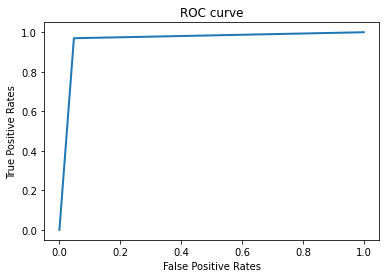

Activation Function applied on Hidden layer 1 = Relu, Hidden_layer 2 =  Relu, Output_Layer: Relu 


6/6 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9766
Loss and Accuracy for ANN Model: [0.2044920027256012, 0.9766082167625427] 


Area Under Curve Score = 0.9696969696969697 




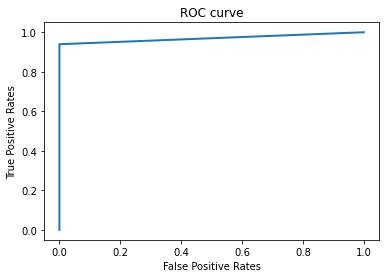

Activation Function applied on Hidden layer 1 = sigmoid, Hidden_layer 2 =  sigmoid, Output_Layer: Softmax 


6/6 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.3860
Loss and Accuracy for ANN Model: [0.06556283682584763, 0.38596490025520325] 


Area Under Curve Score = 0.5 




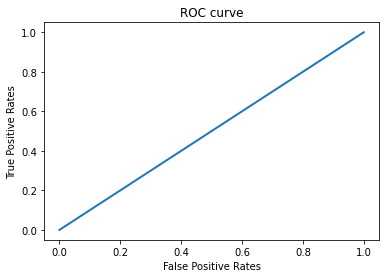

Activation Function applied on Hidden layer 1 = Sigmoid, Hidden_layer 2 =  Sigmoid, Output_Layer: Sigmoid 


6/6 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9825
Loss and Accuracy for ANN Model: [0.09024249017238617, 0.9824561476707458] 


Area Under Curve Score = 0.9800865800865801 




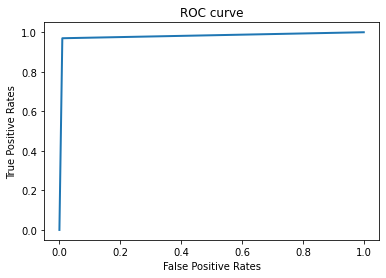

In [22]:
dic = {ann_model_0:ann0, ann_model_1:ann1, ann_model_2:ann2,ann_model_3:ann3}
for i, j in dic.items():
    print("Activation Function applied on",i,'\n\n')
    y_pred = j.predict(X_test)
    y_pred = (y_pred>0.5)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    print("Loss and Accuracy for ANN Model:",j.evaluate(X_test, y_test),'\n\n')
    print('Area Under Curve Score =',roc_auc_score(y_test,y_pred),'\n\n')
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve',linewidth=2)
    plt.ylabel("True Positive Rates")
    plt.xlabel("False Positive Rates")
    plt.title("ROC curve")
    plt.show()